<center><font size="+4">Programming & Data Analytics & AI 1 2024/2025</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Teaching Assistant </font></center>
<center><font size="+2">Sima Sarv Ahrabi Sima.SarvAhrabi@santannapisa.it</font></center>

---

<center><font size="+4">Assignments for</font></center>
<center><font size="+4">Lecture 5: Functions</font></center>

---

In [1]:
#@title RUN, BUT DO NOT MODIFY
%pip install -q newsapi-python
%pip install -q wordcloud
%pip install -q urllib3

url = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/assignments/auto_testing.py'
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/"

import urllib.request
from pathlib import Path

urllib.request.urlretrieve(url,Path(url).name)
from auto_testing import *

def load_list_from_remote(url):
    with urllib.request.urlopen(url) as response:
        text = response.read().decode('utf-8')
        return [line for line in text.split('\n')]


# The Ca**Python**E Restaurant Reviews
The professors have opened a restaurant, The CaPythone, and want to know what the customers think about their business. They have collected thousands of reviews and are interested in knowing whether the overall opinion on the restaurant is positive or negative.

__Can you help them?__

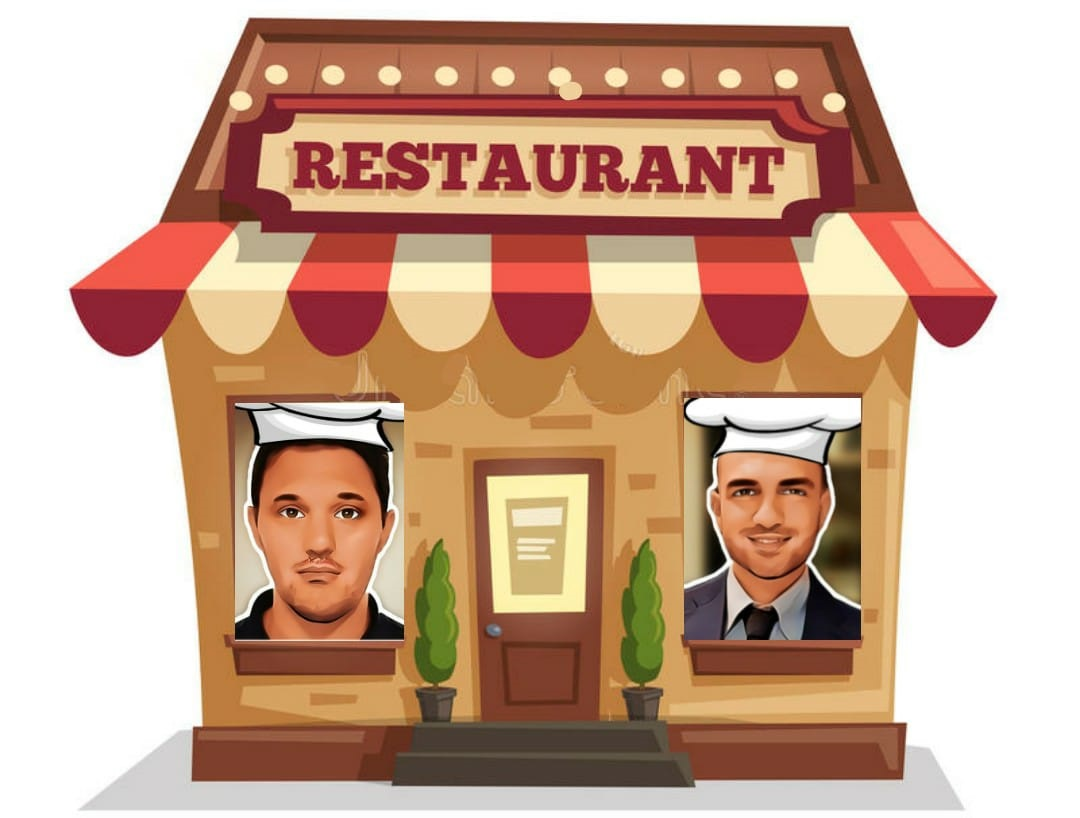



## Sentiment score function
Write a function:
- named `sentiment_score`
- that takes a string `text` as input
- returns a sentiment score (an integer value)  

The sentiment score of `text` will be obtained by the difference among
- the occurrences of positive and negative words in the **cleaned text** (in lower case, remove puntuaction and stopwords).

```
score = frequency of positive words - frequency of negative words
```

The lists of positive and negative words will be provided by the variables `negative_words_list` and `positive_words_list`.

- score > 0 expresses a positive sentiment
- score < 0 expresses a negative sentiment


## Example input to function

```
text = 'I had a bad and frustrating experience with CaPythonE Restaurant'    
sentiment_score(text)
```

## Example output from function

```
-2
```

## Example input to function

```
text = """
I am so happy about the great experience at the CaPythonE Restaurant.
Professors are incredibly skilled and professional.
Thanks again and we hope to see you again soon.
"""
sentiment_score(text)
```

## Example output from function

```
4
```

For your convenience we have already created some helper functions. **Please, run next cell to load data and functions.**

In [2]:
# RUN THIS TO LOAD WORDS LISTs AND UTILITIES FUNCTIONS
# load list of negative words from a remote file


url_neg_w = url_github_repo+'jupyter/jupyterNotebooks/assignments/negative-words.txt'
#url_neg_w = 'https://raw.githubusercontent.com/EMbeDS-education/StatsAndComputing20212022/main/PDA/jupyter/jupyterNotebooks/assignments/negative-words.txt'
negative_words_list = load_list_from_remote(url_neg_w)

# load list of potive words from a remote file
url_pos_w = url_github_repo+'jupyter/jupyterNotebooks/assignments/positive-words.txt'
#url_pos_w = 'https://raw.githubusercontent.com/EMbeDS-education/StatsAndComputing20212022/main/PDA/jupyter/jupyterNotebooks/assignments/positive-words.txt'
positive_words_list = load_list_from_remote(url_pos_w)

import re
from wordcloud import STOPWORDS, WordCloud
# This function removes punctuation from a text
def remove_punctuations(txt):
    return re.sub(r'[^\w\s]','',txt)

# This function removes STOPWORDS from a list of strings
def remove_stopwords(wordlist):
    return [w for w in wordlist if (w not in STOPWORDS)]

# This function visualizes word-frequency pairs in a Word Cloud
def visualize_data(wordcount):
    wc = WordCloud(width=1200,height=600, background_color='white').generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

Write your solution here

HINT: you have to use the helper functions defined in previous cell

In [3]:
#Write your solution here

# write an auxiliary function to clean the text (see the notebook used in class)
def clean_data(content_to_clean):
    return remove_stopwords(remove_punctuations(content_to_clean.lower()).split())

def sentiment_score(text):
    score = 0

    for i in clean_data(text):
        if i in positive_words_list:
            score += 1
        if i in negative_words_list:
            score -= 1

    return score

#You can test your function executing these commands
text = 'I had a bad and frustrating experience with CaPythone Restaurant'
sentiment_score(text)

-2

In [4]:
#@title TEST sentiment_score

inputs=['I had a bad and frustrating experience with Capythone Restaurant',
        """I am so happy about the great experience at the Capythone Restaurant. Professors are incredibly skilled and professional.
           Thanks again and we hope to see you again soon."""]

expected_outputs=[-2,4]

run_and_test_func(inputs,expected_outputs,sentiment_score)

Test I had a bad and frustrating experience with Capythone Restaurant
  Expected and actual output match:
  -2

Test I am so happy about the great experience at the Capythone Restaurant. Professors are incredibly skilled and professional. 
           Thanks again and we hope to see you again soon.
  Expected and actual output match:
  4

Test PASSED!


## Sentiment Analysis Reviews
We can now use the `sentiment_score` function to analyze the sentiment of The CaPythone restaurant reviews and find out if the overall opinion on the restaurant is positive or negative.

Write a function:
- named `my_restaurant_sentiment_analysis`
- that has a list of strings as argument representing text reviews of The CaPythone Restaurant
- returns the overall sentiment score of the reviews

> Note: the total score is calculated on the text consisting of all reviews.
The CaPythone restaurant review lists will be provided by the variables `myreviews_list`.

In [5]:
# RUN THIS TO LOAD REVIEWS LIST
url_myreviews = url_github_repo+'jupyter/jupyterNotebooks/assignments/MyRestaurant_AD_Reviews.txt'
myreviews_list = load_list_from_remote(url_myreviews)
print('Loaded',len(myreviews_list),'Reviews')

Loaded 1992 Reviews


In [6]:
def my_restaurant_sentiment_analysis(reviews_list):
    sum_sentiment = 0

    for r in reviews_list:
        sum_sentiment += sentiment_score(r)

    return sum_sentiment


#You can test your function executing these commands
#my_restaurant_sentiment_analysis(myreviews_list)

In [7]:
#@title TEST my_restaurant_sentiment_analysis
inputs=[myreviews_list[-2:],myreviews_list[:2],myreviews_list[900:902] ]
expected_outputs=[5,-6,-5]
run_and_test_func(inputs,expected_outputs,my_restaurant_sentiment_analysis)

Test ["Amazing chaat and street food just like back in North. The taste and hygiene is awesome, which is why this place is in my list when it comes to street food. Their chats are delicious. I'd ordered pav bhaji, sev puri and vada pav. All was yummy, will recommend this place to anyone who is fond of North Indian food.", '']
  Expected and actual output match:
  5

Test ['We ordered corn cheese balls, manchow soup and paneer shashlik sizzler. The sizzler was stale. Paneer was smelling and the waiter was so impolite to even accept the mistake. Never going again', 'we went for a team lunch, such a worst restaurant.. food was tasteless, service was very slow and Ac was not working. Weâ€™ve requested them multiple times but its of no use. Please donâ€™t waste your money and I strictly recommend not to prefer beyond flavours,']
  Expected and actual output match:
  -6

Test ['cheated', "Worst experience ever. They didn't serve food till 11. Pathetic music. Starters were cold. No one was th

## Bad word-frequency pairs for WordCloud
To improve we need to know our weaknesses.
- We ask you to identify the negative words used in reviews and their frequency.

Write a function:
- named `freq_negative_words`
- that has a list of strings as argument representing text reviews of The CaPythone Restaurant
- returns a dictionary with bad word-frequency pairs

> Note: use the function `clean_data` defined in the previous exercise to clean up the text (in lower case, remove puntuaction and stopwords) and the list of negative words `negative_words_list`

In [14]:
def freq_negative_words(reviews_list):
    freq = {}

    for r in reviews_list:
        for w in clean_data(r):
            if w in negative_words_list:
                if w in freq.keys():
                    freq[w] += 1
                else:
                    freq[w] = 1

    return freq

#You can test your function by executing these commands
#import matplotlib.pyplot as plt
#neg_wordcount = freq_negative_words(myreviews_list)
#visualize_data(neg_wordcount) # plot a wordcloud

In [15]:
#@title TEST freq_negative_words
inputs=[myreviews_list[:2], myreviews_list[-25:] ]
expected_outputs=[{'stale': 1, 'smelling': 1, 'impolite': 1, 'mistake': 1, 'worst': 1, 'slow': 1, 'waste': 1, 'strictly': 1},
                 {'slow': 1, 'limited': 1, 'issues': 1, 'twisted': 1, 'death': 2, 'complaints': 1, 'hang': 1, 'issue': 1, 'costly': 1, 'overloaded': 1, 'hard': 1}]
run_and_test_func(inputs,expected_outputs,freq_negative_words)

Test ['We ordered corn cheese balls, manchow soup and paneer shashlik sizzler. The sizzler was stale. Paneer was smelling and the waiter was so impolite to even accept the mistake. Never going again', 'we went for a team lunch, such a worst restaurant.. food was tasteless, service was very slow and Ac was not working. Weâ€™ve requested them multiple times but its of no use. Please donâ€™t waste your money and I strictly recommend not to prefer beyond flavours,']
  Expected and actual output match:
  {'stale': 1, 'smelling': 1, 'impolite': 1, 'mistake': 1, 'worst': 1, 'slow': 1, 'waste': 1, 'strictly': 1}

Test ['Nice and friendly place. Food was tasty and delicious. Service was very slow. Not able to manage for a bigger crowd of 15 people. Overall a decent place for food.', 'This place is within the SLN mall in Gachibowli. We took the outdoor seating, the ambience is fantastic. Had couple of bears with fries, chilli paneer, dahi kabab and spring rolls. The chilli paneer was very tasty 

## Trend Analysis
Do you think we need to close the restaurant!?
- Maybe analyzing the sentiment trend could help us figure out if we are in a positive or negative trend (we are getting better or worse).

The list of reviews is sorted by the day of in which each review has been written.
- The first item in the list contains a review from the first day the restaurant (day 0),
- The second item contains the review written on the second day (day 1), and so on.

We want to know the _weekly trend_
- E.g., the tuple (0, -10) tells us that the overall score of the first week (0) is negative (-10)

Write a function:
- named `trend_sentiment_analysis`
- that has a list of string argument representing text reviews of The CaPythone Restaurant
- returns a list of tuples containing the association between weeks and review sentiment score (number of week, sentiment score of week)

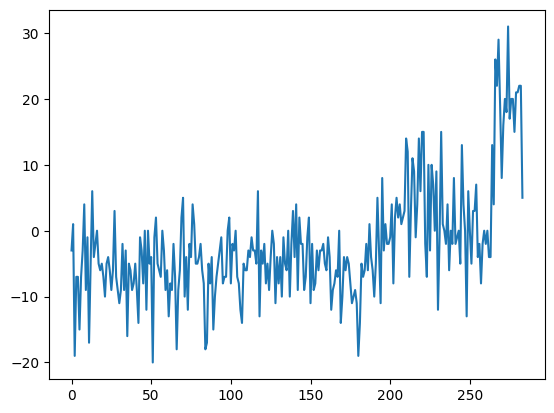

In [22]:
import matplotlib.pyplot as plt

def trend_sentiment_analysis(reviews_list):
    trend = []
    week = 0
    day = 0

    score = 0
    for r in reviews_list:
        score += sentiment_score(r)

        day += 1
        if day > 6:
            trend.append((week, score))

            day = 0
            score = 0
            week += 1

    if day > 0 and False:
        trend.append((week, score))

    return trend

#You can test your function executing these commands
trend = trend_sentiment_analysis(myreviews_list)
plt.plot([x[0] for x in trend],[x[1] for x in trend])

In [23]:
#@title TEST trend_sentiment_analysis
inputs=[myreviews_list[:15], myreviews_list[-15:] ]
expected_outputs=[[(0, -3), (1, 1)], [(0, 13), (1, 10)]]
run_and_test_func(inputs,expected_outputs,trend_sentiment_analysis)

Test ['We ordered corn cheese balls, manchow soup and paneer shashlik sizzler. The sizzler was stale. Paneer was smelling and the waiter was so impolite to even accept the mistake. Never going again', 'we went for a team lunch, such a worst restaurant.. food was tasteless, service was very slow and Ac was not working. Weâ€™ve requested them multiple times but its of no use. Please donâ€™t waste your money and I strictly recommend not to prefer beyond flavours,', 'I would like to introduce this restaurant to a new ingredient called salt. If you add that yo your food, it would taste way better. So basically none of the food we ordered had salt. We ordered Fries, panko mozzarella sticks, Tomato cream soup, panner65 & "Italian" Nachos. Not sure how that was nachos or italian. They basically bought a pack of dorittos and added mozarella cheese on top. The beans were not baked at all, and the entire dish was cold except for the plate that it was brought in. Pretty sure they just dumped the i